# **Import Libraries**

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

from collections import Counter

import warnings
warnings.filterwarnings("ignore")

import seaborn as sns
sns.set_style("whitegrid")

from sklearn.impute import KNNImputer

from sklearn.model_selection import train_test_split
import xgboost as xgb
from sklearn.tree import plot_tree
from sklearn.metrics import accuracy_score, f1_score
from sklearn.metrics import confusion_matrix

from sklearn.tree import DecisionTreeClassifier as dtc, plot_tree, export_graphviz
import pydotplus
from IPython.display import Image

# **Upload and Getting to know the data**

In [2]:
data = pd.read_csv("Titanic-Dataset.csv")

In [3]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


# **Statistical information**

In [5]:
data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


# **EDA**

In [6]:
def bar_plot(category):
  var = data[category]
  varValue = var.value_counts()
  plt.figure(figsize=(9, 3))
  plt.bar(varValue.index, varValue)
  plt.xticks(varValue.index, varValue.index.values)
  plt.ylabel('Frequency')
  plt.title(category)
  plt.show()
  print(f'{category} \n {varValue}')

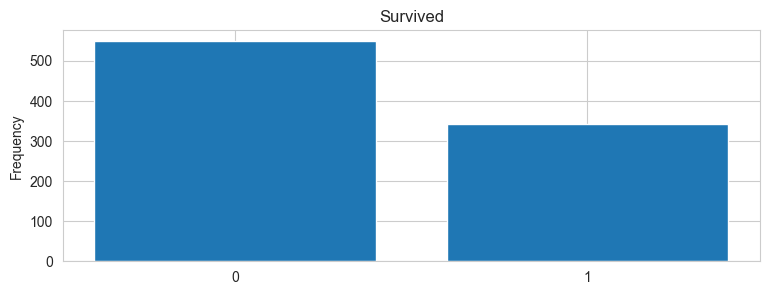

Survived 
 Survived
0    549
1    342
Name: count, dtype: int64


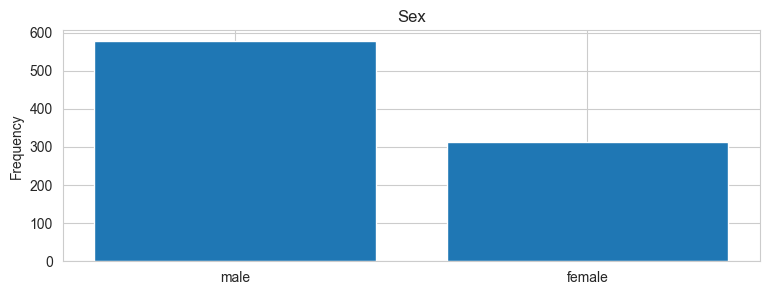

Sex 
 Sex
male      577
female    314
Name: count, dtype: int64


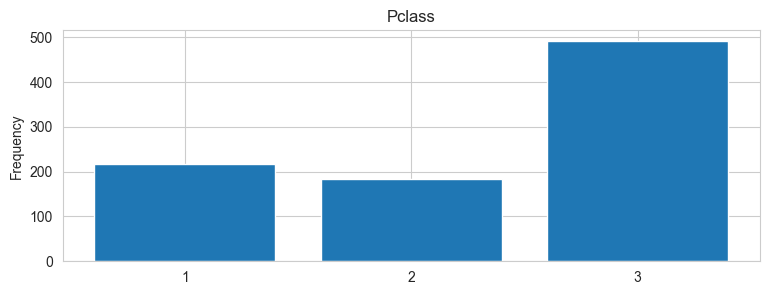

Pclass 
 Pclass
3    491
1    216
2    184
Name: count, dtype: int64


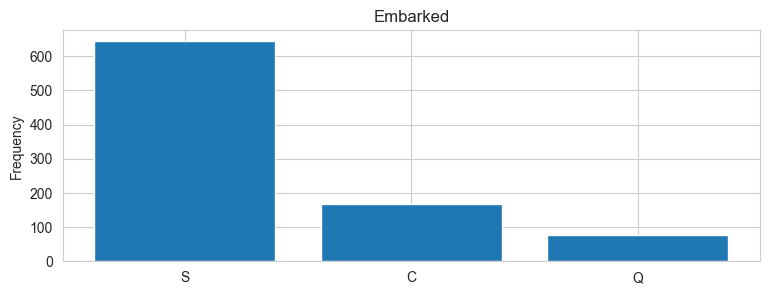

Embarked 
 Embarked
S    644
C    168
Q     77
Name: count, dtype: int64


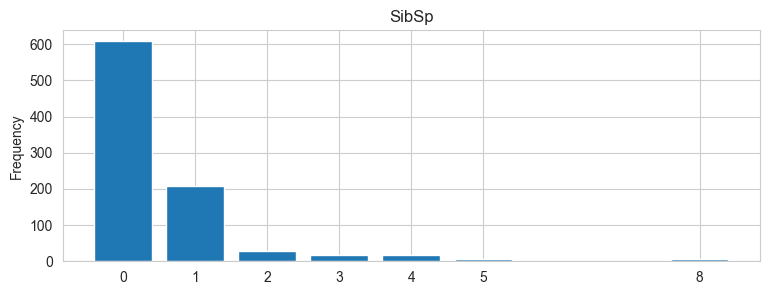

SibSp 
 SibSp
0    608
1    209
2     28
4     18
3     16
8      7
5      5
Name: count, dtype: int64


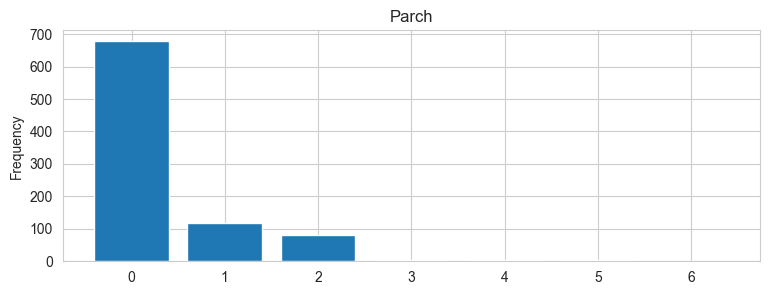

Parch 
 Parch
0    678
1    118
2     80
5      5
3      5
4      4
6      1
Name: count, dtype: int64


In [7]:
category1 = ["Survived", "Sex", "Pclass", "Embarked", "SibSp", "Parch"]
for cat in category1:
  bar_plot(cat)

In [8]:
def plot_hist(category):
  plt.figure(figsize=(9, 3))
  plt.hist(data[category], bins = 50)
  plt.xlabel(category)
  plt.ylabel('Frequency')
  plt.title(f'{category} distribution with histogram')
  plt.show()

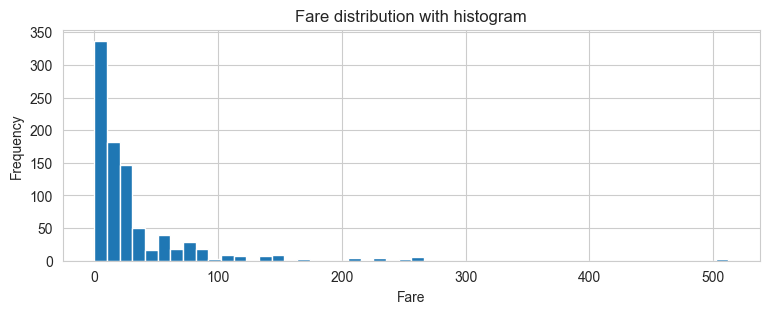

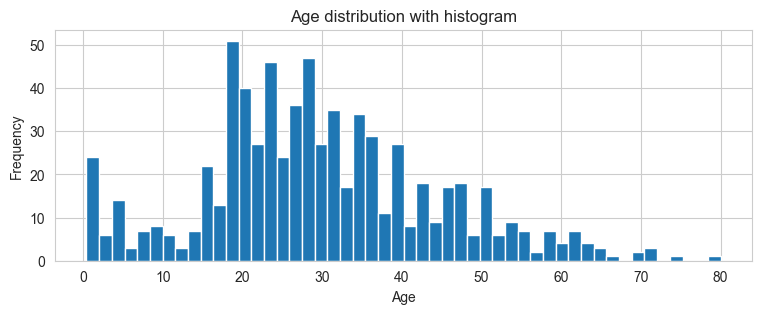

In [9]:
numericVar = ["Fare", "Age"]
for n in numericVar:
  plot_hist(n)
  print(' \n ')

In [10]:
# seperate the data into numeric and categorical
df_num = data[['Age','SibSp','Parch','Fare']]
df_cat = data[['Pclass','Sex', 'Embarked']]

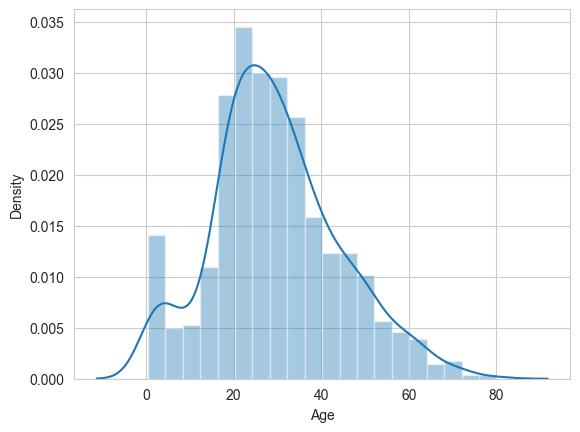

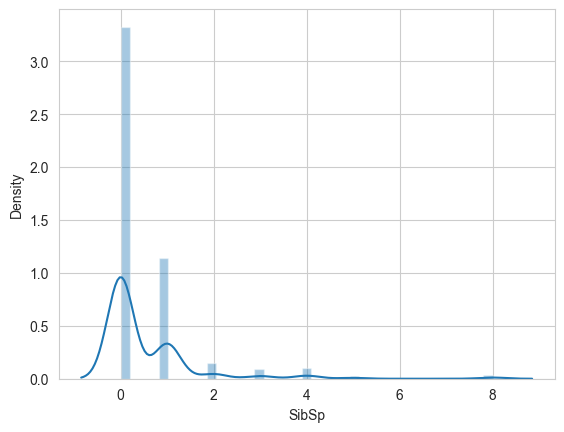

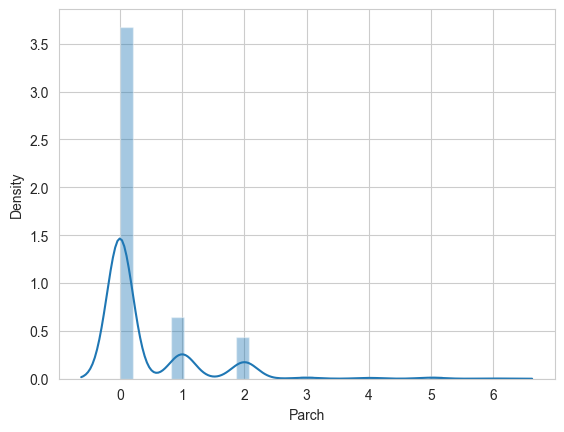

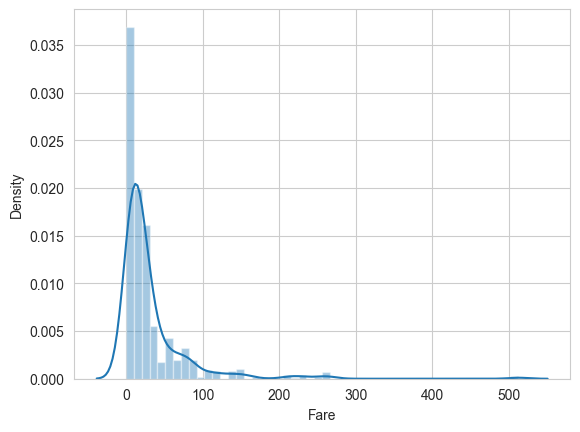

In [11]:
for i in df_num.columns:
    sns.distplot(df_num[i], )
    plt.show()

# **Analysis of the Data**

In [12]:
data[['Pclass', 'Survived']].groupby(['Pclass'], as_index = False).mean().sort_values(
    by = 'Survived',
    ascending = False
)

,Pclass,Survived
0,1,0.629630
1,2,0.472826
2,3,0.242363


In [13]:
data[['Sex', 'Survived']].groupby(['Sex'], as_index = False).mean().sort_values(
    by = 'Survived',
    ascending = False
)

,Sex,Survived
0,female,0.742038
1,male,0.188908


In [14]:
pd.pivot_table(data, index = 'Survived', values = ['Age','SibSp','Parch','Fare'])

,Age,Fare,Parch,SibSp
Survived,,,,
0,30.626179,22.117887,0.329690,0.553734
1,28.343690,48.395408,0.464912,0.473684


In [15]:
def detect_outliers(df, features):
  outlier_indices = []

  for c in features:
    Q1 = np.percentile(data[c], 25)
    Q3 = np.percentile(data[c], 75)
    IQR = Q3 - Q1
    outlier_step = IQR * 1.5
    outlier_list_col = data[(data[c] < Q1 - outlier_step) | (data[c] > Q3 + outlier_step)].index
    outlier_indices.extend(outlier_list_col)

  outlier_indices = Counter(outlier_indices)
  multiple_outliers = list(i for i, v in outlier_indices.items() if v >2)

  return multiple_outliers

In [16]:
data.loc[detect_outliers(data, ['Age', 'SibSp', 'Parch', 'Fare'])]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
27,28,0,1,"Fortune, Mr. Charles Alexander",male,19.0,3,2,19950,263.00,C23 C25 C27,S
88,89,1,1,"Fortune, Miss. Mabel Helen",female,23.0,3,2,19950,263.00,C23 C25 C27,S
159,160,0,3,"Sage, Master. Thomas Henry",male,NaN,8,2,CA. 2343,69.55,NaN,S
180,181,0,3,"Sage, Miss. Constance Gladys",female,NaN,8,2,CA. 2343,69.55,NaN,S
201,202,0,3,"Sage, Mr. Frederick",male,NaN,8,2,CA. 2343,69.55,NaN,S
324,325,0,3,"Sage, Mr. George John Jr",male,NaN,8,2,CA. 2343,69.55,NaN,S
341,342,1,1,"Fortune, Miss. Alice Elizabeth",female,24.0,3,2,19950,263.00,C23 C25 C27,S
792,793,0,3,"Sage, Miss. Stella Anna",female,NaN,8,2,CA. 2343,69.55,NaN,S
846,847,0,3,"Sage, Mr. Douglas Bullen",male,NaN,8,2,CA. 2343,69.55,NaN,S
863,864,0,3,"Sage, Miss. Dorothy Edith ""Dolly""",female,NaN,8,2,CA. 2343,69.55,NaN,S


In [17]:
outlier_indices = detect_outliers(data, ['Age', 'SibSp', 'Parch', 'Fare'])

# Drop rows using the outlier indices
data = data.drop(outlier_indices)
data.shape

(881, 12)

# **Data Transformation**

In [18]:
data['Sex'] = data['Sex'].map({'male': 0, 'female': 1})

In [19]:
del data["PassengerId"]
del data["Name"]
del data["Ticket"]
del data["Cabin"]

In [20]:
data.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,0,22.0,1,0,7.2500,S
1,1,1,1,38.0,1,0,71.2833,C
2,1,3,1,26.0,0,0,7.9250,S
3,1,1,1,35.0,1,0,53.1000,S
4,0,3,0,35.0,0,0,8.0500,S


In [21]:
data['Embarked'].fillna(data['Embarked'].mode(), inplace = True)

In [22]:
data = pd.get_dummies(data, "Embarked")

In [23]:
data.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked_C,Embarked_Q,Embarked_S
0,0,3,0,22.0,1,0,7.2500,False,False,True
1,1,1,1,38.0,1,0,71.2833,True,False,False
2,1,3,1,26.0,0,0,7.9250,False,False,True
3,1,1,1,35.0,1,0,53.1000,False,False,True
4,0,3,0,35.0,0,0,8.0500,False,False,True


# **Filling missing values**

In [24]:
df=data.select_dtypes(exclude='object')
# create an object for KNNImputer
imputer = KNNImputer(n_neighbors=3)
df_imputer = imputer.fit_transform(df)
df_imputer.shape

(881, 10)

In [25]:
data = pd.DataFrame(df_imputer, columns = df.columns)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 881 entries, 0 to 880
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Survived    881 non-null    float64
 1   Pclass      881 non-null    float64
 2   Sex         881 non-null    float64
 3   Age         881 non-null    float64
 4   SibSp       881 non-null    float64
 5   Parch       881 non-null    float64
 6   Fare        881 non-null    float64
 7   Embarked_C  881 non-null    float64
 8   Embarked_Q  881 non-null    float64
 9   Embarked_S  881 non-null    float64
dtypes: float64(10)
memory usage: 69.0 KB


# **Correlations**

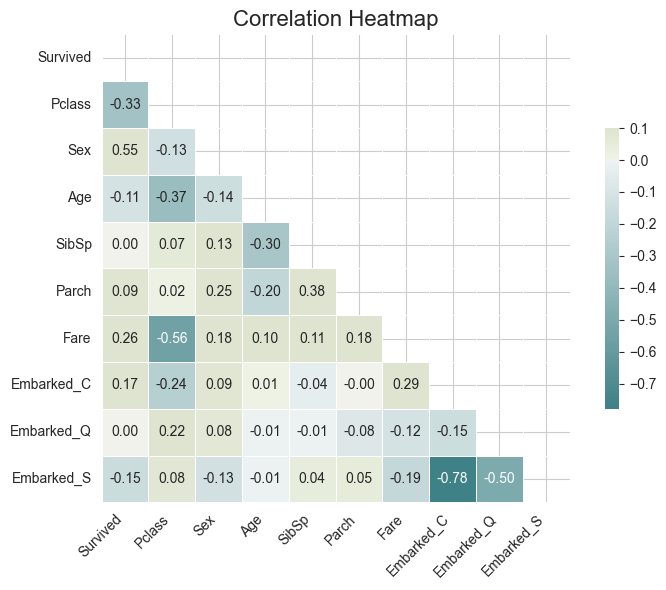

In [26]:
corr = data.corr()
cmap = sns.diverging_palette(200, 100, as_cmap=True)

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=np.bool))

# Set up the matplotlib figure
fig, ax = plt.subplots(figsize=(8, 6))

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=0.1, center=0, annot=True,
            fmt=".2f", square=True, linewidths=0.5, cbar_kws={"shrink": 0.6})

ax.set_title("Correlation Heatmap", fontsize=16)
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

# **Creating Model**

In [27]:
target = "Survived"

In [28]:
y = data[target]

In [29]:
X = data.drop(target, axis=1)

In [30]:
X_train, X_test, y_train, y_test=train_test_split(X, y, test_size=0.40, stratify=y)

In [31]:
# Train XGBoost model

xgb_model = xgb.XGBClassifier(n_estimetors = 5, random_state=42)
xgb_model.fit(X_train, y_train)
xgb_predictions = xgb_model.predict(X_test)
xgb_accuracy = accuracy_score(y_test, xgb_predictions)
xgb_f1_score = f1_score(y_test, xgb_predictions)
print(f"XGBoost Accuracy: {xgb_accuracy}")
print(f"XGBoost F1 score: {xgb_f1_score}")

XGBoost Accuracy: 0.7875354107648725
XGBoost F1 score: 0.7126436781609196


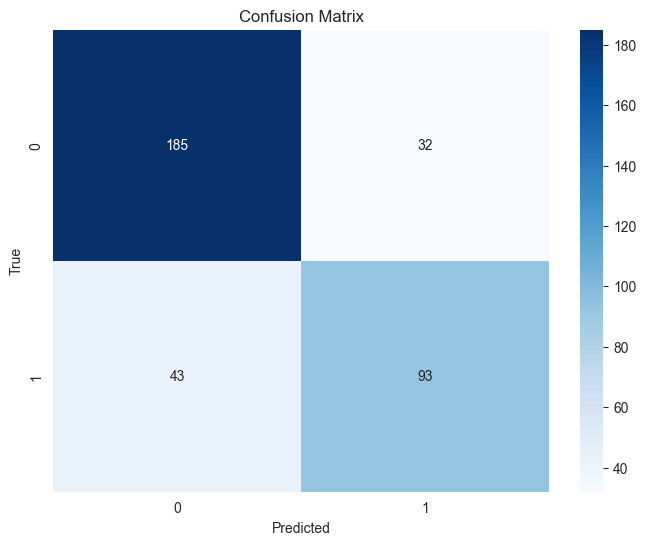

In [32]:
# Create confusion matrix
conf_matrix = confusion_matrix(y_test, xgb_predictions)

# Plot confusion matrix as a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, cmap='Blues', fmt='d',
            xticklabels=xgb_model.classes_, yticklabels=xgb_model.classes_)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

# **Explanation of results by using simple tree model**

![tree](https://external-content.duckduckgo.com/iu/?u=https%3A%2F%2Ftse1.mm.bing.net%2Fth%3Fid%3DOIP.mqeVd66hQd74efsLtjZbRwHaFp%26pid%3DApi&f=1&ipt=e4c6bc8ed82cfb675780880ffc27b2be403c29991807669837bba731db156ad6&ipo=images)


In [33]:
simple_tree = dtc(max_depth=3, criterion='gini')
simple_tree.fit(X_train, y_train)

,criterion,'gini'
,splitter,'best'
,max_depth,3
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,None
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,None


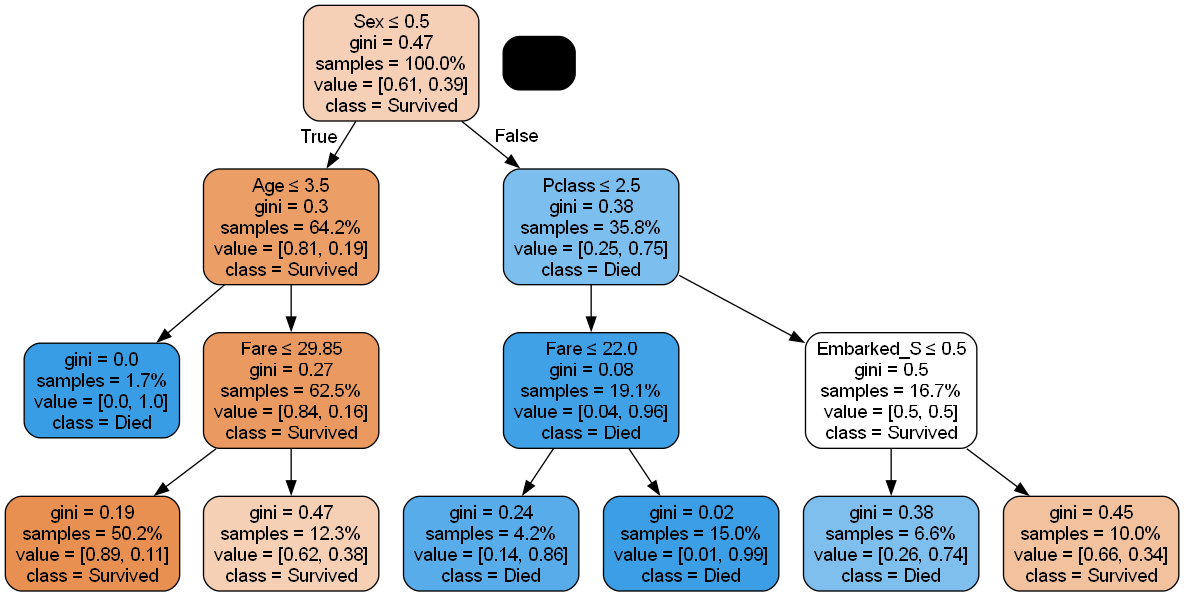

In [34]:
features = X_train.columns
class_names = ['Survived', 'Died']

def plot_tree(model, out_file, max_depth):

    dot_data = export_graphviz(decision_tree=model, out_file=out_file,
                                    max_depth=3,
                                    feature_names=features,
                                    class_names=class_names,
                                    filled=True, rounded=True,
                                    special_characters=True,
                                    proportion = True, precision=2,
                                    label='all', impurity=True,
                                   )

    graph = pydotplus.graphviz.graph_from_dot_file(out_file)
    return Image(graph.create_png())

plot_tree(simple_tree, out_file="small_tree.out", max_depth=3)

In [ ]:
print("Decision Tree Visualization:")